> <div class = 'markdown-google-sans'>
> <h1>PERCEPTRON</h1>
> <p>A perceptron is a basic building block in deep learning that works in a somewhat similar way. It’s a simple type of artificial neuron used for binary classification tasks deciding between two options, like "yes" or "no."</p></div>


In [108]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y

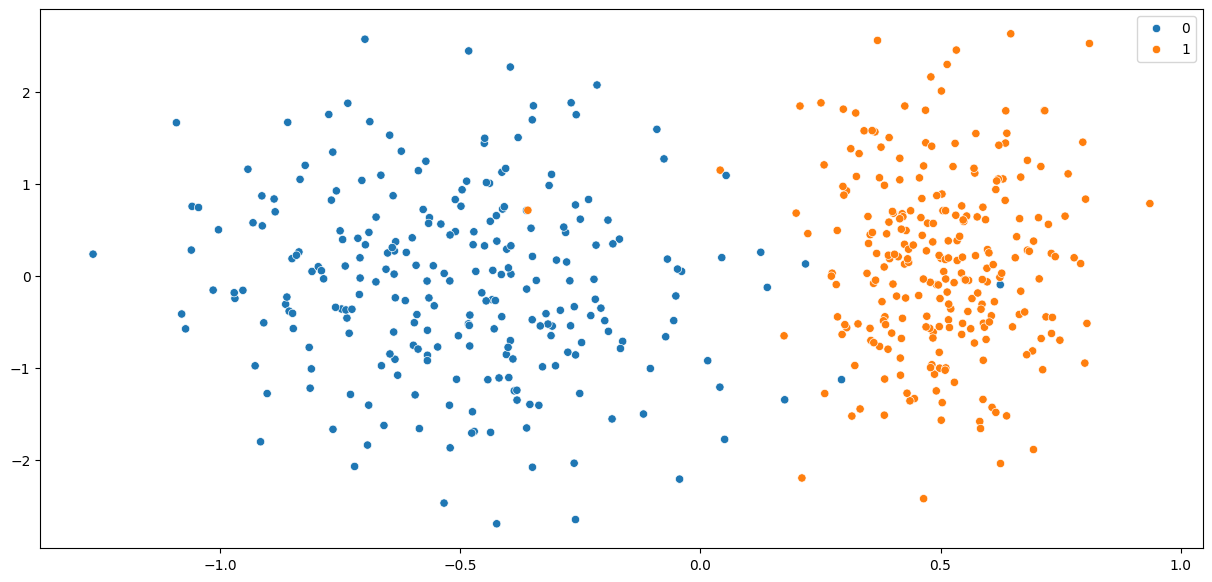

In [109]:
X, y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_informative = 1,
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    class_sep = 0.5,
    random_state = 42
)

plt.figure(figsize=(15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.show()

> <div class = "markdown-google-sans"><h1>WORKING OF PERCEPTRON</h1>
> <ul>
  <li>Inputs: It takes in multiple pieces of information, which we call inputs.</li><br>
  <li>Weights: Each input is associated with a weight, which represents how important that input is.</li><br>
  <li>Weighted Sum: The perceptron multiplies each input by its weight and adds them all up. This is like calculating a total score based on how important each piece of information is.</li><br>
  <li>Activation Function: After calculating the weighted sum, the perceptron uses a function to make a final decision. In its simplest form, this is a step function. If the weighted sum is above a certain threshold, it outputs one option (like "yes" for taking an umbrella). If it’s below, it outputs the other option (like "no").</li>
</ul></div>


In [110]:
class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, epochs):
        self.coef_ = None        # Coefficients for the features (weights)
        self.intercept_ = None   # Intercept term (bias)
        self.lr = lr             # Learning rate for weight updates
        self.epochs = epochs     # Number of iterations for training

    def step(self, fx):
        # Activation function: returns 1 if fx >= 0, otherwise -1
        return 1 if fx >= 0 else -1

    def fit(self, X_train, y_train):
        # Checking X and y for compatibality
        X_train, y_train = check_X_y(X_train, y_train)

        # Convert y_train to -1 and 1
        y_train = np.where(y_train == 0, -1, y_train)

        # Initialize weights (coef_) and intercept (intercept_) to small random values
        self.coef_ = np.random.randn(X_train.shape[1])
        self.intercept_ = 0

        # Gradient Descent algorithm
        for _ in range(self.epochs):
            for idx in np.random.permutation(X_train.shape[0]):
                # Calculate predicted value (y_hat) for each training example
                y_hat = self.step(np.dot(X_train[idx], self.coef_) + self.intercept_)

                # Update the weights and intercept if there is a misclassification - step loss -> |y - y_hat|
                # y_hat != y_train[idx] is an alternative for |y - y_hat| > 0
                if y_hat != y_train[idx]:
                    self.coef_ += self.lr * y_train[idx] * X_train[idx]
                    self.intercept_ += self.lr * y_train[idx]
                    # The derivative wrt all the coefficients are -ve so we are adding in the formula rather than subtracting

        return self

    def predict(self, X_test):
        # Calculate the weighted sum for each test example
        ans = np.dot(X_test, self.coef_) + self.intercept_
        # Apply the step function to determine the class label
        return np.where(ans > 0, 1, 0)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [112]:
model = Perceptron(0.01, 100)
model.fit(X_train, y_train)

Perceptron(epochs=100, lr=0.01)

In [113]:
print(model.intercept_)
print(model.coef_)

-0.009999999999999997
[ 0.06077713 -0.00130824]


In [114]:
f1_score(y_test, model.predict(X_test))

0.9896907216494846

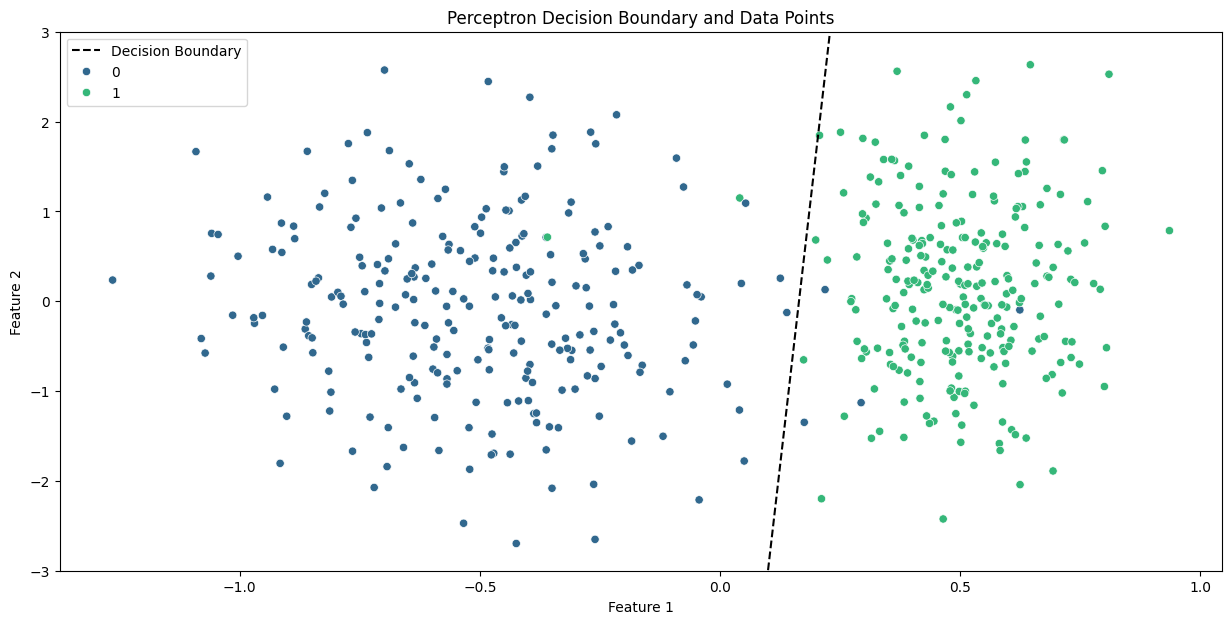

In [115]:
# Assuming X is your feature matrix and y is the target array
# Calculate the decision boundary
weight = -model.coef_[0] / model.coef_[1]
bias = -model.intercept_ / model.coef_[1]

# Create a range of values for the decision boundary plot
temp_x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)

# Decision boundary equation
temp_x2 = weight * temp_x1 + bias

# Plot the decision boundary
plt.figure(figsize=(15, 7))

# Plot decision boundary
plt.plot(temp_x1, temp_x2, 'k--', label='Decision Boundary')

# Plot the data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', legend='full')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Data Points')

# Add a legend and show the plot
plt.ylim(-3, 3)
plt.legend()
plt.show()

<hr>

> <div class = 'markdown-google-sans'><h1>Sklearn Class - Perceptron</h1>
> <p>Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. In fact, Perceptron() is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).</p></div>


In [116]:
from sklearn.linear_model import Perceptron
model = Perceptron(
    penalty=None,
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=1e-3,
    shuffle=True,
    verbose=0,
    eta0=1.0,
    n_jobs=-1,
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=5,
)

In [117]:
model.fit(X_train, y_train)

Perceptron(n_jobs=-1, random_state=42)

In [118]:
print(model.coef_)
print(model.intercept_)

[[8.20161597 0.85333221]]
[-1.]


In [119]:
f1_score(y_test, model.predict(X_test))

1.0

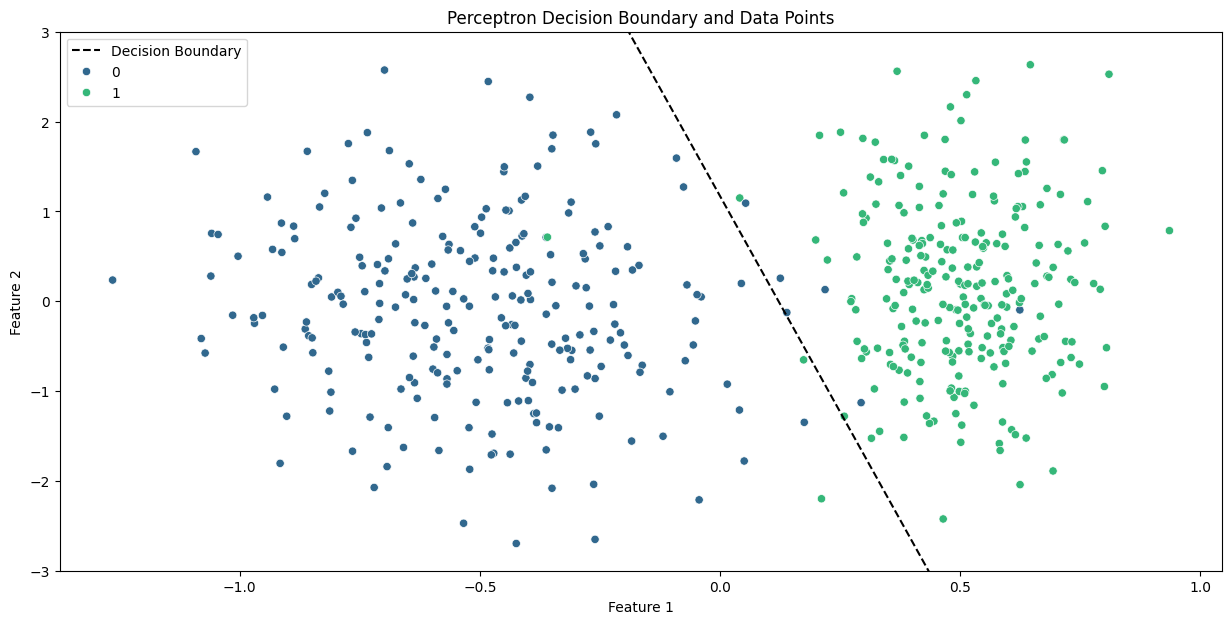

In [120]:
# Assuming X is your feature matrix and y is the target array
# Calculate the decision boundary
weight = -model.coef_[0][0] / model.coef_[0][1]
bias = -model.intercept_ / model.coef_[0][1]

# Create a range of values for the decision boundary plot
temp_x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)

# Decision boundary equation
temp_x2 = weight * temp_x1 + bias

# Plot the decision boundary
plt.figure(figsize=(15, 7))

# Plot decision boundary
plt.plot(temp_x1, temp_x2, 'k--', label='Decision Boundary')

# Plot the data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', legend='full')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Data Points')

# Add a legend and show the plot
plt.ylim(-3, 3)
plt.legend()
plt.show()

In [121]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X_train, y_train)
assert (sgd_clf.coef_ == model.coef_).all()
assert (sgd_clf.intercept_ == model.intercept_).all()
print("Assertion Successful")

Assertion Successful


<hr>

<div class = "markdown-google-sans"><h1>Multilayer Perceptron (MLP)</h1>
<ul>
  <li>In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. However, if you want to guarantee that the output will always be positive, then you can use the ReLU activation function, or the softplus activation function in the output layer.<br><br></li>
  <li>Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and scale the labels to the appropriate range: 0 to 1 for the logistic function, or –1 to 1 for the hyperbolic tangent.<br><br></li>
  <li>The MLPRegressor class cannot use any support activation function in the output layer.</li>
</ul></div>


In [57]:
from sklearn.neural_network import MLPClassifier # MLPClassifier - for classification

In [120]:
mlp_clf = MLPClassifier(
    max_iter = 5000,
    hidden_layer_sizes = [2, 1], # "I increased the number of layers, and as a result, the model began to overfit the data significantly."
    tol = 0.00001,
    random_state=42)
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[2, 1], max_iter=5000, random_state=42,
              tol=1e-05)

In [123]:
y_pred = mlp_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [124]:
f1_score(y_test, y_pred)

1.0